Section 1 - static model

Equilibrium number of free users:  2479.99
Equilibrium number of premium users:  122.99
Equilibrium price of the premium version:  51.39
Maximum profit:  5049.59
Derivative of profit: -7.12e-07


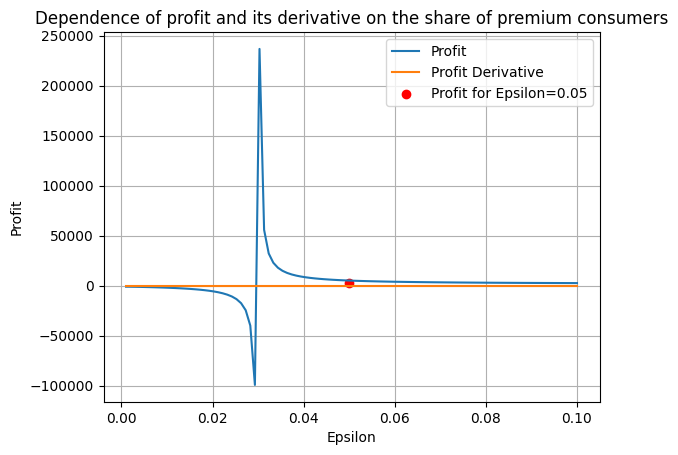

Share of premium consumers:  0.04


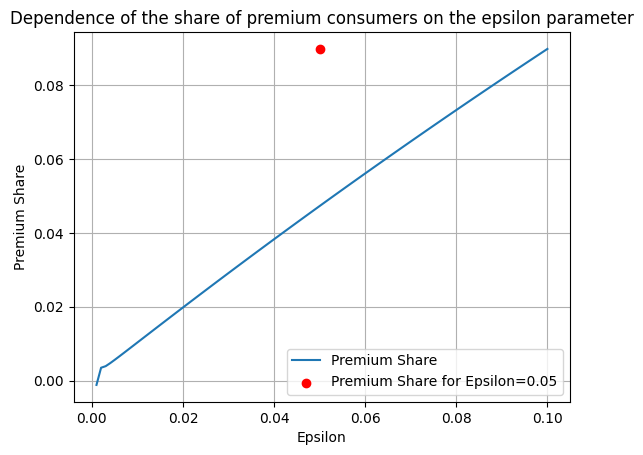

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_profit(a, b, c, f, FC, v1, v2, epsilon):
    # Calculation of equilibrium quantities of consumers
    if epsilon != 0:
        q1 = 1 / epsilon * ((a * epsilon + b * f) - (v1 + epsilon * v2)) / (2 * (epsilon * c - b)) + f / epsilon
        q2 = ((a * epsilon + b * f) - (v1 + epsilon * v2)) / (2 * (epsilon * c - b))
    else:
        q1 = q2 = np.inf

    # Calculation of the equilibrium price
    if epsilon != 0:
        p2 = (a * epsilon + b * f + v1 + epsilon * v2) / (2 * epsilon)
    else:
        p2 = 0

    # Calculation of profit
    if epsilon != 0:
        profit = ((a * epsilon + b * f) - (v1 + epsilon * v2)) ** 2 / (4 * epsilon * (epsilon * c - b)) - FC - v1 * f / epsilon
    else:
        profit = -np.inf

    return q1, q2, p2, profit

def calculate_profit_derivative(a, b, c, f, v1, v2, epsilon):
    if epsilon != 0:
        A = a - v2
        B = b * f - v1
        alpha = -A ** 2 * b - 2 * A * B * c + 4 * v1 * f * c ** 2
        beta = -8 * b * v1 * f * c - 2 * B ** 2 * c
        gamma = b * B ** 2 + 4 * b ** 2 * v1 * f
        D = beta ** 2 - 4 * alpha * gamma

        epsilon_1 = (-beta - np.sqrt(D)) / (2 * alpha)
        epsilon_2 = (-beta + np.sqrt(D)) / (2 * alpha)

        derivative = alpha * (epsilon - epsilon_1) * (epsilon - epsilon_2) * epsilon ** 2 * (epsilon * c - b) ** 2
    else:
        derivative = np.inf

    return derivative

# Input parameters
a = 100
b = 0.03
c = 1
f = 1
FC = 1000
v1 = 0.1
v2 = 0.2
epsilon = 0.05

# Calculation of profit and its derivative for epsilon = 0.05
q1, q2, p2, profit = calculate_profit(a, b, c, f, FC, v1, v2, epsilon)
derivative = calculate_profit_derivative(a, b, c, f, v1, v2, epsilon)

# Displaying the results
print("Equilibrium number of free users: ", "{:.2f}".format(round(q1 - 0.005, 2)))
print("Equilibrium number of premium users: ", "{:.2f}".format(round(q2 - 0.005, 2)))
print("Equilibrium price of the premium version: ", "{:.2f}".format(round(p2 - 0.005, 2)))
print("Maximum profit: ", "{:.2f}".format(round(profit - 0.005, 2)))
print("Derivative of profit:", "{:.2e}".format(derivative))

# Building a graphic
epsilon_vals = np.linspace(0, 0.1, 100)
profits = []
derivatives = []
for e in epsilon_vals:
    _, _, _, profit = calculate_profit(a, b, c, f, FC, v1, v2, e)
    derivative =calculate_profit_derivative(a, b, c, f, v1, v2, e)
    profits.append(profit)
    derivatives.append(derivative)

plt.plot(epsilon_vals, profits, label='Profit')
plt.plot(epsilon_vals, derivatives, label='Profit Derivative')
plt.scatter(epsilon, profit, color='red', label='Profit for Epsilon=0.05')
plt.xlabel('Еpsilon')
plt.ylabel('Profit')
plt.title('Dependence of profit and its derivative on the share of premium consumers')
plt.legend()
plt.grid(True)
plt.show()


def calculate_premium_share(q1, q2):
    # Calculating the share of premium consumers
    premium_share = q2 / (q1 + q2)
    return premium_share

# Calculating the share of premium consumers for epsilon = 0.05
premium_share = calculate_premium_share(q1, q2)

# Outputting the result
print("Share of premium consumers: ", "{:.2f}".format(round(premium_share - 0.005, 2)))

# Building a graphic
premium_shares = []
for e in epsilon_vals:
    q1, q2, _, _ = calculate_profit(a, b, c, f, FC, v1, v2, e)
    premium_share = calculate_premium_share(q1, q2)
    premium_shares.append(premium_share)

plt.plot(epsilon_vals, premium_shares, label='Premium Share')
plt.scatter(epsilon, premium_share, color='red', label='Premium Share for Epsilon=0.05')
plt.xlabel('Еpsilon')
plt.ylabel('Premium Share')
plt.title('Dependence of the share of premium consumers on the epsilon parameter')
plt.legend()
plt.grid(True)
plt.show()



Chapter 1 - the dynamic time model

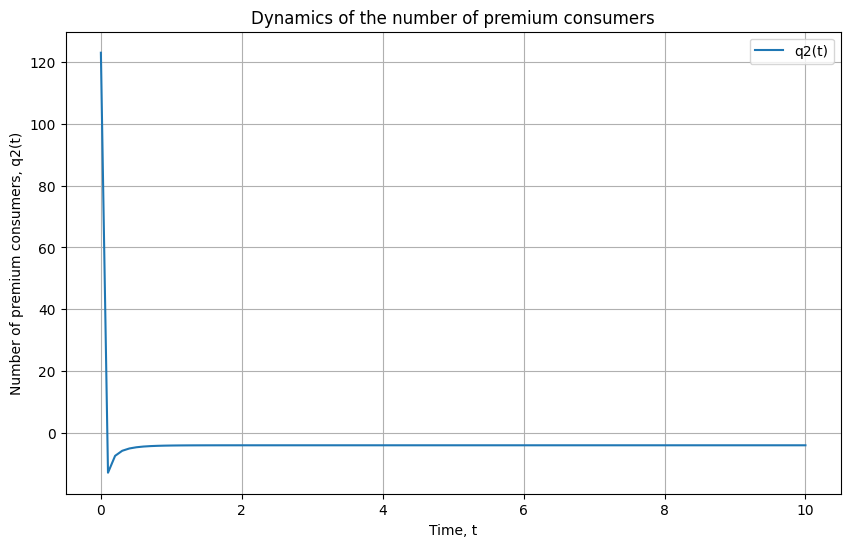

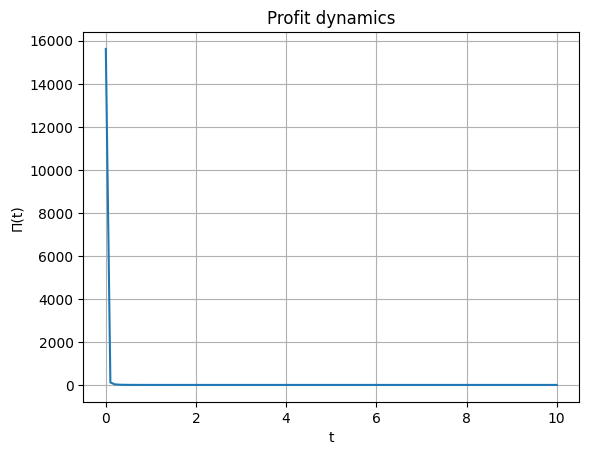

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of constants
M1 = 1
M2 = 4
M0 = 0
D = M2**2 - 4*M1*M0
q2_I = (-M2 + np.sqrt(D)) / (2*M1)
q2_II = (-M2 - np.sqrt(D)) / (2*M1)
N1 = 1 / (q2_I - q2_II)
q2_0 = 123
c = np.log((q2_0 - q2_I) / (q2_0 - q2_II))

# Definition of the function П
def П(q2):
    return M1 * q2**2 + M2 * q2 + M0

# Function for calculating q2(t)
def q2(t):
    if abs((q2_0 - q2_I) / (q2_0 - q2_II)) > 0:
        return q2_II + (q2_II - q2_I) / (np.exp(c) * np.exp(M1/N1*t) - 1)
    else:
        return q2_II + (q2_II - q2_I) / (np.exp(c) * np.exp(M1/N1*t) + 1)

# Defining a time range
t_values = np.linspace(0, 10, 100)

# Calculating q2(t) for each time value
q2_values = [q2(t) for t in t_values]

# Building a graphic
plt.figure(figsize=(10, 6))
plt.plot(t_values, q2_values, label='q2(t)')
plt.xlabel('Time, t')
plt.ylabel('Number of premium consumers, q2(t)')
plt.title('Dynamics of the number of premium consumers')
plt.legend()
plt.grid(True)
plt.show()

# Generate data for the profit chart
П_values = [П(q2) for q2 in q2_values]

# Building a profit graphic
plt.figure()
plt.plot(t_values, П_values)
plt.xlabel('t')
plt.ylabel('П(t)')
plt.title('Profit dynamics')
plt.grid(True)
plt.show()


Section 2 - discrete model

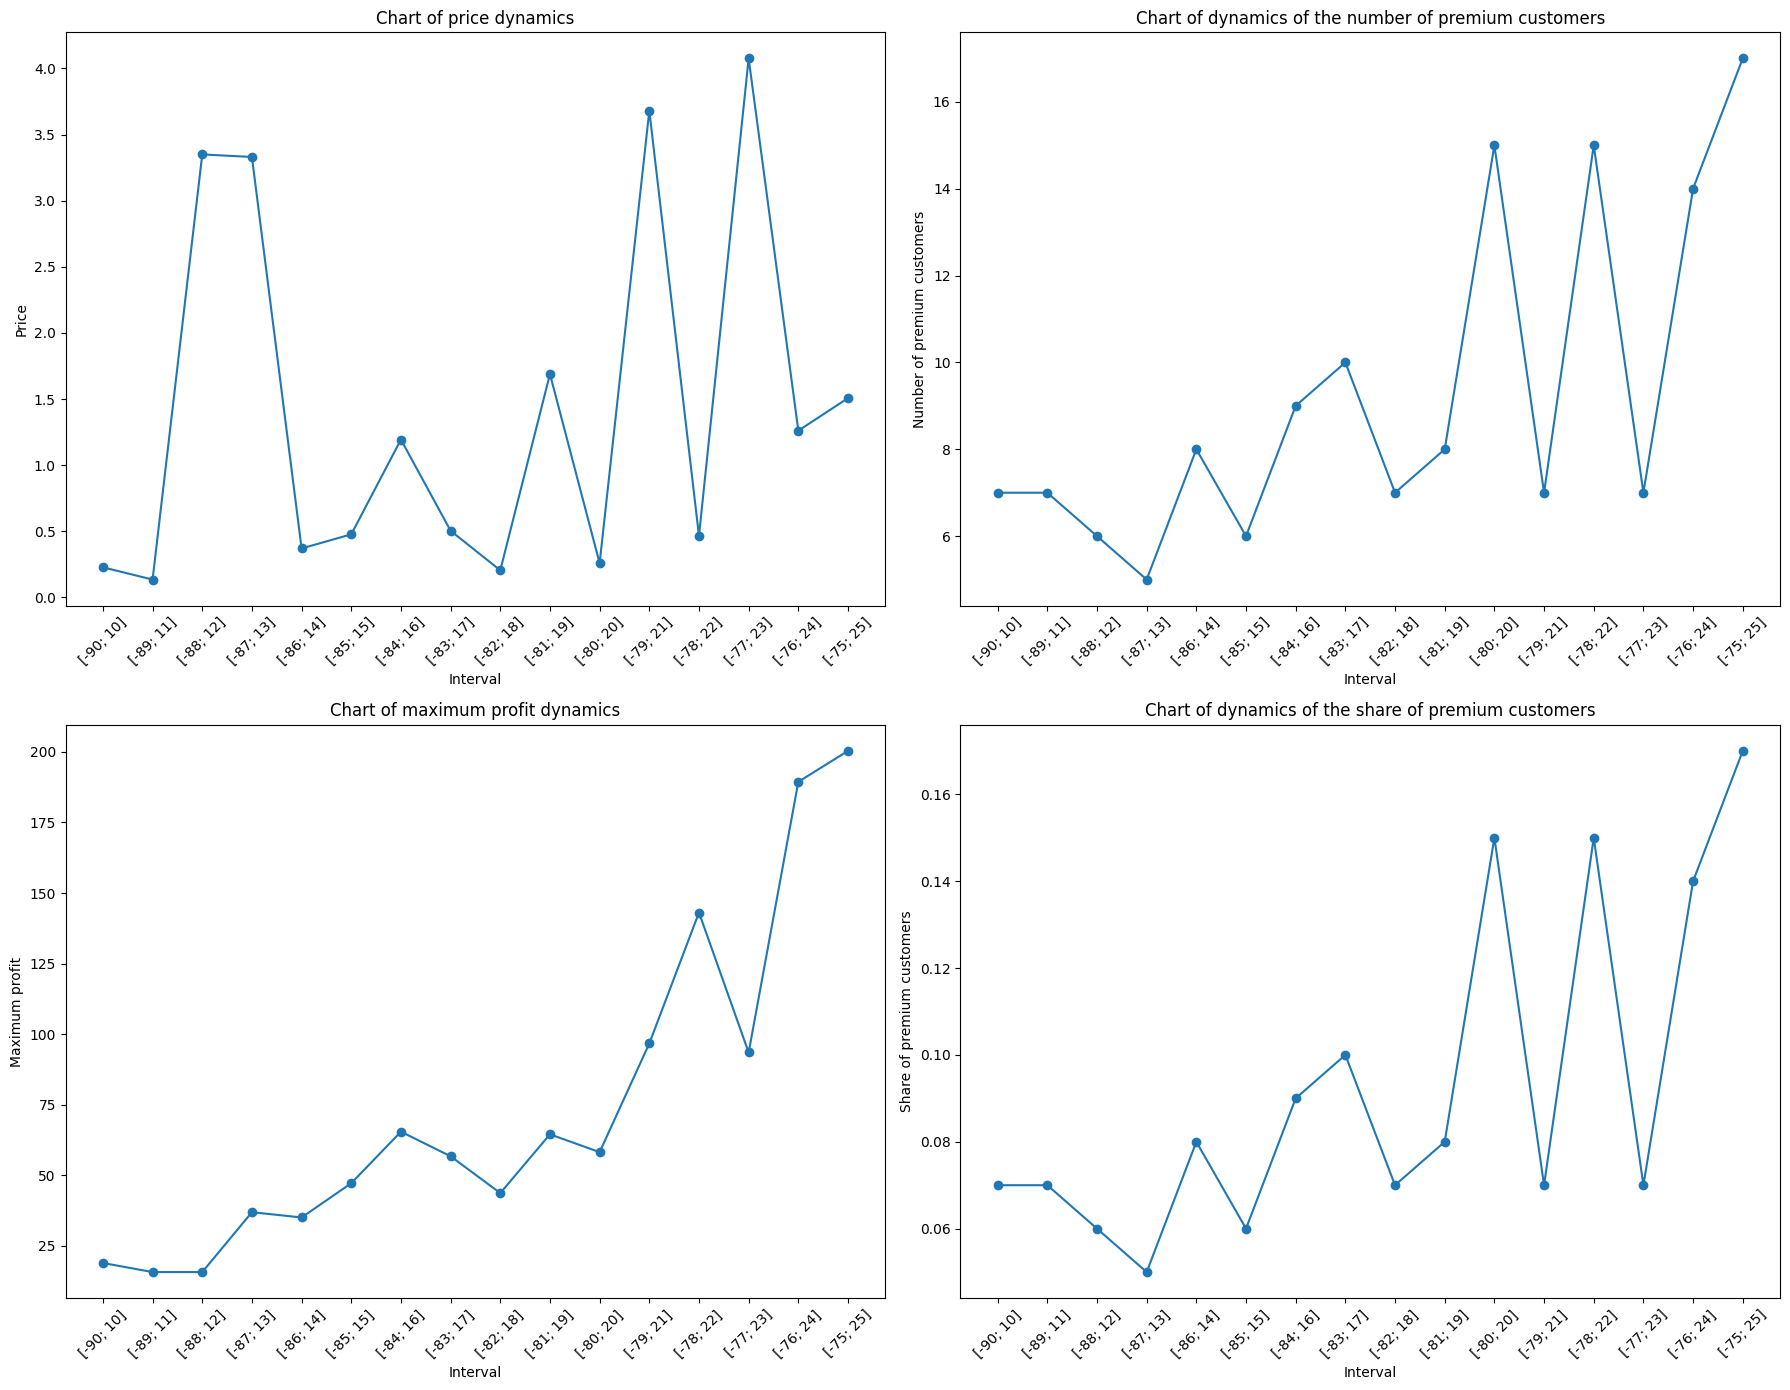

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

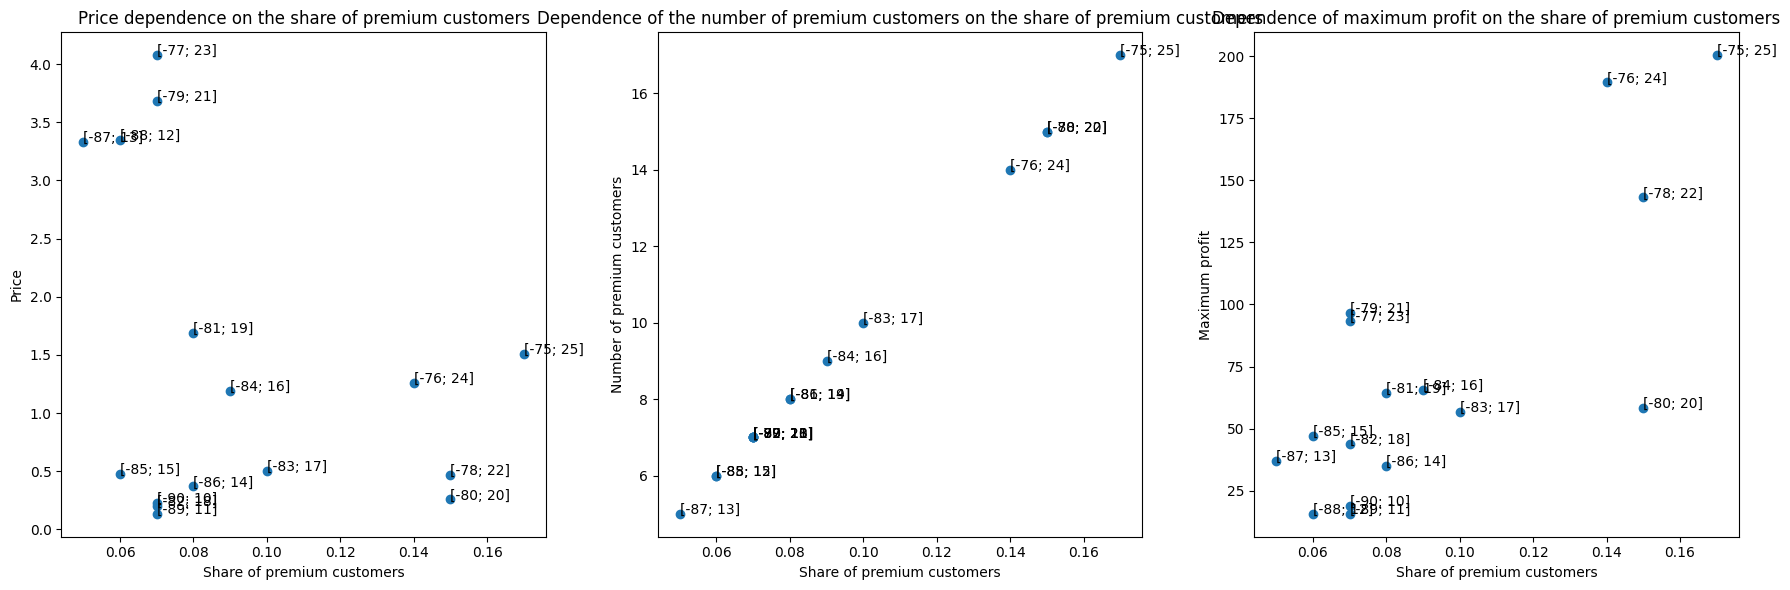

Global maximum profit: 200.3512200848096
Global spacing for maximum profit: [-75; 25]
Price for global maximum profit: 1.5067507990102342
Number of premium customers for global profit maximization: 17.0
Share of premium customers for global profit maximization: 0.17


Saving general.xlsx to general.xlsx
All values from the file:
     Interval  Mean Price  Price standard deviation  Mean Premium Customers  \
0   [-90; 10]    0.961956                  0.827521                    6.10   
1   [-89; 11]    0.855153                  0.894915                    6.56   
2   [-88; 12]    1.062998                  0.928786                    7.36   
3   [-87; 13]    0.936386                  0.943625                    7.40   
4   [-86; 14]    0.871538                  0.730489                    7.54   
5   [-85; 15]    0.835305                  0.842175                    8.66   
6   [-84; 16]    1.048611                  1.030346                    9.50   
7   [-83; 17]    0.939237                  0.925499                    9.80   
8   [-82; 18]    0.960434                  0.870996                   10.02   
9   [-81; 19]    0.961316                  0.814313                   10.80   
10  [-80; 20]    0.982627                  0.860654                  

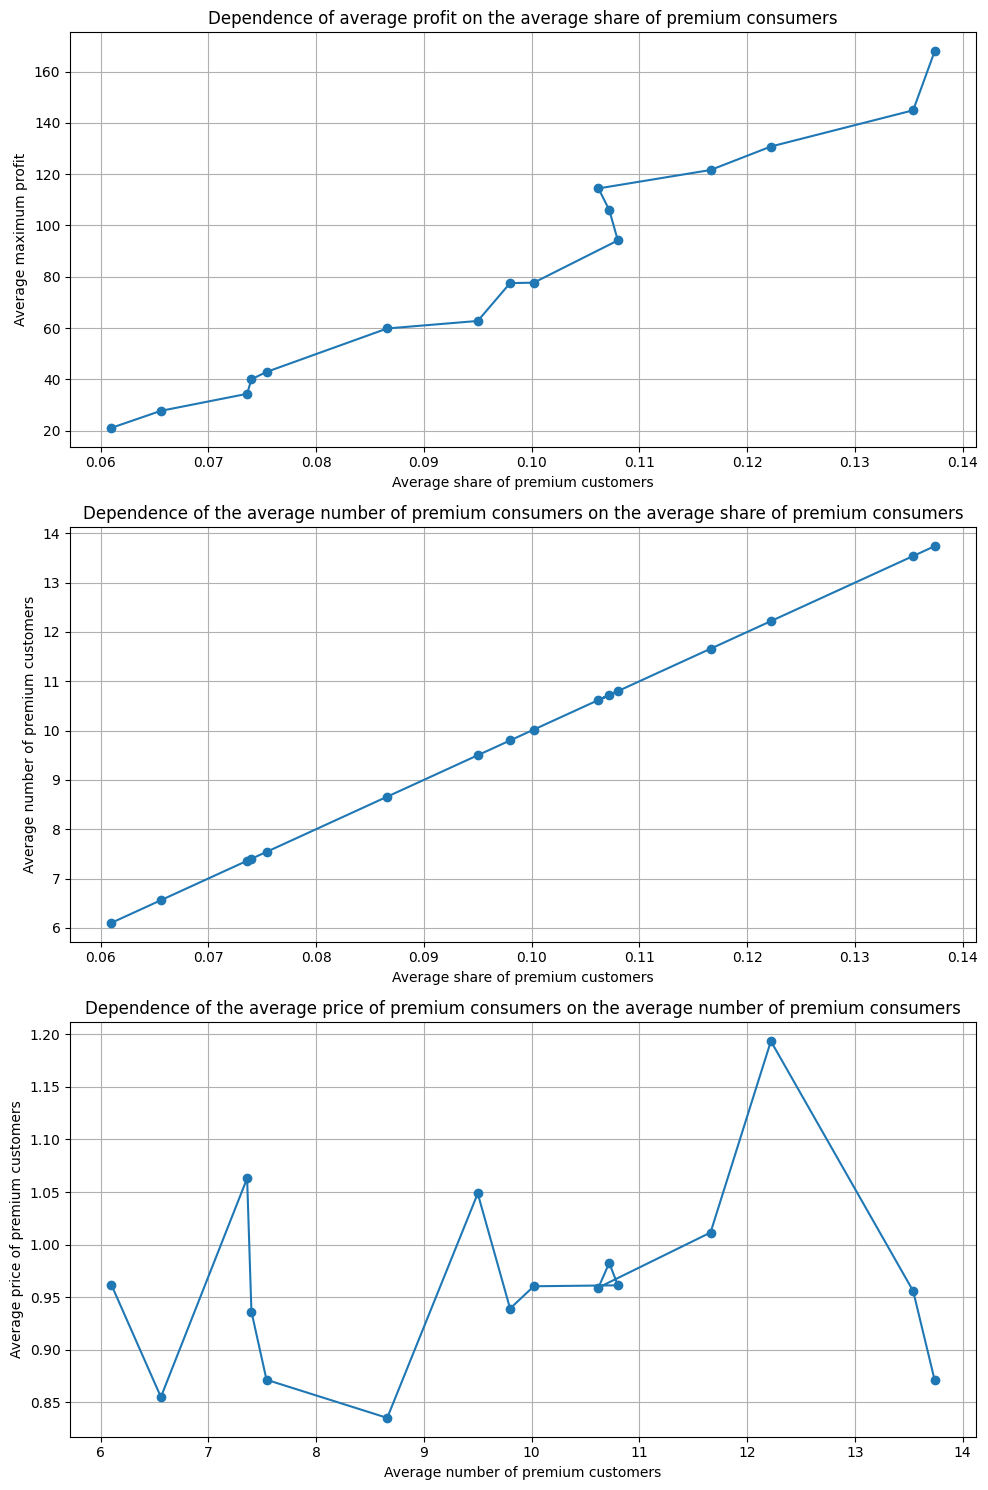

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Global variables
num_intervals = 16
V_min_global = -90
V_max_global = 10
c1 = 0.1  # Parameters for determining profit
c2 = 0.4   # Parameters for determining profit

# Function for calculating profit
def calculate_profit(V, q):
    return (V - c2) * q - c1 * (100 - q)

# Initializing vectors
prices_vector = np.zeros(num_intervals)
premium_customers_vector = np.zeros(num_intervals)
profits_vector = np.zeros(num_intervals)
premium_ratio_vector = np.zeros(num_intervals)

# Global For loop
for i in range(num_intervals):
    V_min = V_min_global + i
    V_max = V_max_global + i

    # For-1 cycle
    V = np.random.uniform(V_min, V_max, 100)
    V_sorted = np.sort(V)
    V_positive = V_sorted[V_sorted > 0]

    # Price vector
    prices_vector[i] = V_positive[0]

    # For-2 cycle
    profits = []
    premium_customers = []  # Will keep the number of premium customers for each V
    for v in V_positive:
        q = len(V_positive) - np.searchsorted(V_positive, v)
        premium_customers.append(q)
        profits.append(calculate_profit(v, q))

    # Completion of the For-2 cycle
    max_profit_index = np.argmax(profits)
    profits_vector[i] = profits[max_profit_index]
    premium_customers_vector[i] = premium_customers[max_profit_index]
    premium_ratio_vector[i] = premium_customers[max_profit_index] / 100

# Step 2. Building graphics
intervals = [f"[{V_min_global + i}; {V_max_global + i}]" for i in range(num_intervals)]

plt.figure(figsize=(18, 14))

# Chart of price dynamics
plt.subplot(2, 2, 1)
plt.plot(intervals, prices_vector, marker='o')
plt.title('Chart of price dynamics')
plt.xlabel('Interval')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate the signatures along the X-axis by 45 degrees for better visibility

# Chart of dynamics of the number of premium customers
plt.subplot(2, 2, 2)
plt.plot(intervals, premium_customers_vector, marker='o')
plt.title('Chart of dynamics of the number of premium customers')
plt.xlabel('Interval')
plt.ylabel('Number of premium customers')
plt.xticks(rotation=45)  # Rotate the signatures along the X-axis by 45 degrees for better visibility

# Chart of maximum profit dynamics
plt.subplot(2, 2, 3)
plt.plot(intervals, profits_vector, marker='o')
plt.title('Chart of maximum profit dynamics')
plt.xlabel('Interval')
plt.ylabel('Maximum profit')
plt.xticks(rotation=45)  # Rotate the signatures along the X-axis by 45 degrees for better visibility

# Chart of dynamics of the share of premium customers
plt.subplot(2, 2, 4)
plt.plot(intervals, premium_ratio_vector, marker='o')
plt.title('Chart of dynamics of the share of premium customers')
plt.xlabel('Interval')
plt.ylabel('Share of premium customers')
plt.xticks(rotation=45)  # Rotate the signatures along the X-axis by 45 degrees for better visibility

plt.tight_layout()
plt.show()

# Creating a DataFrame with data
data = {
    'Interval': intervals,
    'Price': prices_vector,
    'Premium Customers': premium_customers_vector,
    'Max Profit': profits_vector,
    'Premium Ratio': premium_ratio_vector
}
df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_filename = 'simulations.xlsx'
df.to_excel(excel_filename, index=False)

# Download the file to your local computer
files.download(excel_filename)

# Dependency charts
plt.figure(figsize=(18, 6))

# Chart of price dependence on the share of premium customers
plt.subplot(1, 3, 1)
plt.plot(premium_ratio_vector, prices_vector, marker='o', linestyle='')
plt.title('Price dependence on the share of premium customers')
plt.xlabel('Share of premium customers')
plt.ylabel('Price')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], prices_vector[i], interval)

# Chart of the number of premium customers versus the share of premium customers
plt.subplot(1, 3, 2)
plt.plot(premium_ratio_vector, premium_customers_vector, marker='o', linestyle='')
plt.title('Dependence of the number of premium customers on the share of premium customers')
plt.xlabel('Share of premium customers')
plt.ylabel('Number of premium customers')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], premium_customers_vector[i], interval)

# Chart of the dependence of maximum profit on the share of premium customers
plt.subplot(1, 3, 3)
plt.plot(premium_ratio_vector, profits_vector, marker='o', linestyle='')
plt.title('Dependence of maximum profit on the share of premium customers')
plt.xlabel('Share of premium customers')
plt.ylabel('Maximum profit')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], profits_vector[i], interval)

plt.tight_layout()
plt.show()

# Step 3. Determination of equilibrium indicators
max_profit_global = np.max(profits_vector)
max_profit_index_global = np.argmax(profits_vector)
price_global = prices_vector[max_profit_index_global]
premium_customers_global = premium_customers_vector[max_profit_index_global]
premium_ratio_global = premium_ratio_vector[max_profit_index_global]

print("Global maximum profit:", max_profit_global)
print("Global spacing for maximum profit:", intervals[max_profit_index_global])
print("Price for global maximum profit:", price_global)
print("Number of premium customers for global profit maximization:", premium_customers_global)
print("Share of premium customers for global profit maximization:", premium_ratio_global)

# Uploading a file
uploaded = files.upload()

# Reading data from a file
df_general = pd.read_excel('general.xlsx')

# Print all values from a file
print("All values from the file:")
print(df_general)

# Building charts
plt.figure(figsize=(10, 15))

# Chart of the dependence of average profit on the average share of premium consumers
plt.subplot(3, 1, 1)
plt.plot(df_general['Mean Premium Ratio'], df_general['Mean Max Profit'], marker='o')
plt.title('Dependence of average profit on the average share of premium consumers')
plt.xlabel('Average share of premium customers')
plt.ylabel('Average maximum profit')
plt.grid(True)

# Chart of the relationship between the average number of premium customers and the average share of premium customers
plt.subplot(3, 1, 2)
plt.plot(df_general['Mean Premium Ratio'], df_general['Mean Premium Customers'], marker='o')
plt.title('Dependence of the average number of premium consumers on the average share of premium consumers')
plt.xlabel('Average share of premium customers')
plt.ylabel('Average number of premium customers')
plt.grid(True)

# Chart of the dependence of the average price of premium consumers on the average number of premium consumers
plt.subplot(3, 1, 3)
plt.plot(df_general['Mean Premium Customers'], df_general['Mean Price'], marker='o')
plt.title('Dependence of the average price of premium consumers on the average number of premium consumers')
plt.xlabel('Average number of premium customers')
plt.ylabel('Average price of premium customers')
plt.grid(True)

plt.tight_layout()
plt.show()




The third section

Microsoft in the short term (linear regression)

---



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression object
linreg = LinearRegression()

# Training the model on the training set
linreg.fit(X_train, y_train)

# Add a column with a constant to the X matrix for use in the statsmodels library
X_train_sm = sm.add_constant(X_train)

# Build and train a model on an extended training set for statistical estimation
linreg_sm = sm.OLS(y_train, X_train_sm).fit()

# Making predictions on a test set
y_pred = linreg.predict(X_test)

# Displaying metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', linreg.score(X_test, y_test))
print('Coefficients of the linear regression model: ', linreg.coef_)

# Display advanced statistical information
print(linreg_sm.summary())





Mean Absolute Error: 2069.6709375278188
Mean Squared Error: 4640185.355932941
Root Mean Squared Error: 2154.1089470899424
R-squared: 0.8259179980494238
Coefficients of the linear regression model:  [ 3.94550382e+00 -9.85378482e-01  4.43761859e+02  7.83609266e+03]
                            OLS Regression Results                            
Dep. Variable:           Total_Income   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     5.751
Date:                Tue, 23 Apr 2024   Prob (F-statistic):            0.00951
Time:                        17:29:04   Log-Likelihood:                -143.70
No. Observations:                  16   AIC:                             297.4
Df Residuals:                      11   BIC:                             301.3
Df Model:                           4                                         
Covariance Type:         

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


decision tree

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Calculate the correlation between the features and the target variable
correlation = X.corrwith(y)

# Determine the direction of influence for each feature
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Create a decision tree model object
tree_reg = DecisionTreeRegressor()

# Training the model on the training set
tree_reg.fit(X_train, y_train)

# We derive the importance of the features
feature_importance = pd.DataFrame(tree_reg.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the decision tree regressor:")
print(feature_importance)

# We derive the direction of influence for each feature
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Calculating MSLE
mse = mean_squared_error(y_test, tree_reg.predict(X_test))
# Calculating RMSE
rmse = np.sqrt(mse)

# Calculate the coefficient of determination
r_squared = tree_reg.score(X_test, y_test)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)



Feature importance of the decision tree regressor:
                Importance
R&D_Expenses      0.817347
SG&A_Expenses     0.157231
Inflation_Rate    0.012386
News_Sentiment    0.013036

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 3504.795999769459
Mean Squared Error (MSE): 12283595.0
R-squared: 0.5391665106619091


Random Forest

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Calculate the correlation between the features and the target variable
correlation = X.corrwith(y)

# Determine the direction of influence for each feature
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Create a random forest model object
forest_reg = RandomForestRegressor()

# Training the model on the training set
forest_reg.fit(X_train, y_train)

# We derive the importance of the features
feature_importance = pd.DataFrame(forest_reg.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the random forest regressor:")
print(feature_importance)

# We derive the direction of influence for each feature
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Make predictions on the test set
y_pred = forest_reg.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
# Calculating RMSE
rmse = np.sqrt(mse)

# Coefficient of determination
r_squared = forest_reg.score(X_test, y_test)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the random forest regressor:
                Importance
R&D_Expenses      0.698302
SG&A_Expenses     0.168856
Inflation_Rate    0.068238
News_Sentiment    0.064604

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 3003.0296569547895
Mean Squared Error: 9018187.120550001
Coefficient of Determination (R^2): 0.6616721213727017


Gradient Boosting

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Calculate the correlation between the features and the target variable
correlation = X.corrwith(y)

# Determine the direction of influence for each feature
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Create an object of the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Training the model on the training set
gb_model.fit(X_train, y_train)

# We derive the importance of the features
feature_importance = pd.DataFrame(gb_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the Gradient Boosting regressor:")
print(feature_importance)

# We derive the direction of influence for each feature
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Predict values for the test set
y_pred = gb_model.predict(X_test)

# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
# Calculating RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the Gradient Boosting regressor:", mse)

# Coefficient of determination
r_squared = gb_model.score(X_test, y_test)
print("Coefficient of Determination (R^2):", r_squared)



Feature importance of the Gradient Boosting regressor:
                Importance
R&D_Expenses      0.816462
SG&A_Expenses     0.140601
Inflation_Rate    0.010351
News_Sentiment    0.032586

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 2686.9530639335117
Mean Squared Error of the Gradient Boosting regressor: 7219716.767781686
Coefficient of Determination (R^2): 0.7291438483498066


XGBoost

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Calculate the correlation between the features and the target variable
correlation = X.corrwith(y)

# Determine the direction of influence for each feature
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Create an object of the XGBoost model
xgb_model = xgb.XGBRegressor()

# Training the model on the training set
xgb_model.fit(X_train, y_train)

# We derive the importance of the features
feature_importance = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the XGBoost regressor:")
print(feature_importance)

# We derive the direction of influence for each feature
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Predicting values for a test set
y_pred = xgb_model.predict(X_test)

# Calculation of Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculation RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the XGBoost regressor:", mse)

# Coefficient of determination
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the XGBoost regressor:
                Importance
R&D_Expenses      0.613227
SG&A_Expenses     0.049772
Inflation_Rate    0.232951
News_Sentiment    0.104050

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 2723.865464590021
Mean Squared Error of the XGBoost regressor: 7419443.069186211
Coefficient of Determination (R^2): -5.625519121598473


AdaBoost

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create a DataFrame with data
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Quarter
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Net profit, USD million
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Research and development expenses, USD million
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Selling, general and administrative expenses, USD million
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Inflation rate (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # The sentiment of the news
}
df = pd.DataFrame(data)

# Define the variables X and y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Calculate the correlation between the features and the target variable
correlation = X.corrwith(y)

# Determine the direction of influence for each feature
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Create an object of the AdaBoost model
ada_model = AdaBoostRegressor()

# Training the model on the training set
ada_model.fit(X_train, y_train)

# We derive the importance of the features
feature_importance = pd.DataFrame(ada_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the AdaBoost regressor:")
print(feature_importance)

# We derive the direction of influence for each feature
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Predicting values for a test set
y_pred = ada_model.predict(X_test)

# Calculation of Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculation RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the AdaBoost regressor:", mse)

# Coefficient of determination
r_squared = ada_model.score(X_test, y_test)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the AdaBoost regressor:
                Importance
R&D_Expenses      0.691311
SG&A_Expenses     0.163513
Inflation_Rate    0.087071
News_Sentiment    0.058105

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 3174.5127064812823
Mean Squared Error of the AdaBoost regressor: 10077530.923611116
Coefficient of Determination (R^2): 0.6219295947611245
